# 4-2 다양한 머신러닝 기법들
+ 다항 회귀
+ 결정 트리

## 1. 다항 회귀<sup><small>polynomial regression</small></sup>

\begin{align}
f(x) = y = {\theta_2x^2} + {\theta_1x} + {\theta_0}
\end{align}

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc + 'life_expectancy.csv')

life.head()

life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 
             'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
life.dropna(inplace=True)
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 
          'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

preprocessing 서브 모듈의 PolynomialFeatures 클래스를 활용해 입력 데이터를 다항 회귀에 사용

Mean squared error: 76.29829579714013


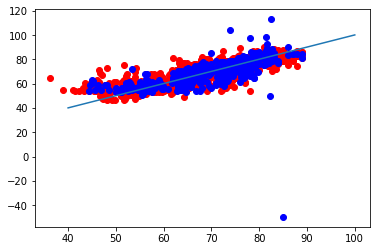

In [2]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree=4)
X = poly_feature.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color='r')
plt.scatter(y_test, y_hat_test, color='b')
plt.plot([40, 100], [40, 100])
print('Mean squared error:', mean_squared_error(y_test, y_hat_test))

## 2. 다항 회귀의 문제점
+ 과적합
+ 폭발적인 복잡도 증가

In [3]:
print('Mean squared error:', mean_squared_error(y_train, y_hat_train))
print('검증용 데이터에 비해서 낮은 값을 갖음\n')

print(X.shape)
print('다항식의 차수가 높아질수록 입력의 크기가 폭발적으로 증가')

Mean squared error: 28.417489310159567
검증용 데이터에 비해서 낮은 값을 갖음

(2306, 210)
다항식의 차수가 높아질수록 입력의 크기가 폭발적으로 증가


## 3. 과적합과 과소적합 - 공짜 점심은 없다

**과적합**<sup>overfitting</sup>이란 학습에 사용된 데이터에 대해서는 좋은 성능을 보이지만 새로운 데이터에 대해 적용하면 성능이 잘 나오지 않는, 즉 **일반화 능력이 떨어지는 모델**이 만들어지는 것

**과소적합**<sup>underfitting</sup>이란 학습 데이터를 설명하는 함수를 제대로 찾지 못하여 학습 데이터와 다른 데이터 모두에 대해 예측을 제대로 하지 못하는 모델이 만들어지는 것

## 4. 정보이론

+ 정보이론의 기본 원리: 확률이 작을수록 많은 정보
+ 자기 정보<sup>self information</sup>: 사건(메세지)의 정보량
\begin{align}
{h(e_i) = -\log_2P(e_i) \ \ \ 또는 \ \ \  h(e_i)=-\log_eP(e_i)}
\end{align}

### 4-1.엔트로피(Entropy, 확률분포의 불확실성 또는 무질서도)
\begin{align}
{이산 확률분포 \ \ \ H(x) = -\sum_{i=1,k}P(e_i)\log_2P(e_i) \ \ \ 또는 \ \ \  H(x)=-\sum_{i=1,k}P(e_i)\log_eP(e_i)}
\end{align}

\begin{align}
{연속 확률분포 \ \ \ H(x) = -\int_RP(x)\log_2P(x) \ \ \ 또는 \ \ \  H(x)=-\int_RP(x)\log_eP(x)}
\end{align}

### 4-2. 교차 엔트로피<sup>cross entropy</sup>
두 확률분포 P와 Q사이의 교차 엔트로피
\begin{align}
{H(P, Q) = -\sum_xP(x)\log_2Q(x) = -\sum_{i=1,k}P(e_i)\log_2Q(e_i) \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \, = H(P) + \sum_xP(x)\log_2{P(x) \over Q(x)}
}
\end{align}

### 4-3. KL 다이버전스
두 확률분포 사이의 거리를 계산할 때 주로 사용
\begin{align}
{KL(P \ || \ Q) = \sum_xP(x)\log_2{P(x) \over Q(x)}
}
\end{align}

교차 엔트로피와 KL 다이버전스의 관계
\begin{align}
{H(P, Q) = \ \ \ \ \ H(P) \ \ \ \ \, + \ \ \ \ \sum_xP(x)\log_2{P(x) \over Q(x)} \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \, = P의 엔트로피 + P와 Q간의 KL 다이버전스
}
\end{align}

## 5. 결정트리<sup><small><small>Decision Tree</small></small></sup>
결정 트리의 원리
+ 스무고개와 개념이 비슷
+ 최적 기준에 따라 자동으로 질문을 만들어야 함

유리한 정도의 판단 기준은?
+ X<sub>Tleft</sub>와 X<sub>Tright</sub>가 동질일 수록 좋다.

불순도(impurity) 측정기준
+ 엔트로피(entropy)
\begin{align}
im(T) = -\sum_{i=1}^M P(w_i \ | \ T) \log_2 P(w_i \ | \ T)
\end{align}

+ 지니 불순도(Gini impurity)
\begin{align}
im(T) = 1 - \sum_{i=1}^M P(w_i \ | \ T)^2 = \sum_{i \ne j} P(w_i \ | \ T) P(w_j \ | \ T)
\end{align}

+ 오분류 불순도(misclassification impurity)
\begin{align}
im(T) = 1 - \max_i P(w_i \ | \ T)
\end{align}

+ 노드 T에서 w<sub>i</sub>가 발생할 확률은
\begin{align}
P(w_i \ | \ T) = {X_T에서 w_i에 속한 샘플의 수 \over |X_T|}
\end{align}

+ 불순도 감소향 또는 투잉 기준이 최대인 질문을 취함
  + 불순도 감소량
  \begin{align}
  \triangle im(T) = im(T) - {|X_{Tleft}| \over |X_T|}im(T_{left}) - {|X_{Tright}| \over |X_T|}im(T_{right})
  \end{align}

  + 투잉 기준(twoing criteria)
  \begin{align}
  \triangle im(T) ={|X_{Tleft}| \over |X_T|}{|X_{Tright}| \over |X_T|} \left(\sum_{i=1}^M | p(w_i \ | \ T_{left}) - p(w_i \ | \ T_{right})| \right)^2
  \end{align}

## 6. 사이킷런의 결정 트리로 붓꽃 분류하기

dec_tree_for_iris.dot  Week3.ipynb    Week4-2.ipynb
dec_tree_for_iris.jpg  Week4-1.ipynb  Week4-3.ipynb


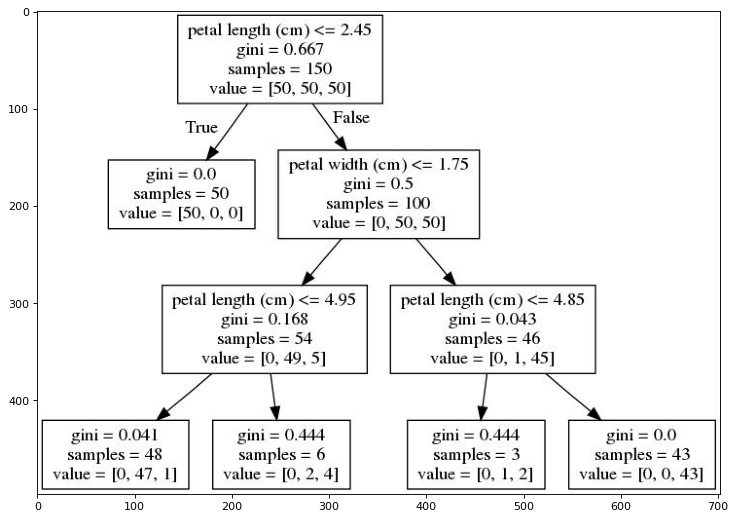

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X, y)

########################################
#     export_graphviz 함수를 사용하여     #
#     dec_tree의 out_fule 인자에 저장된   #
#     파일 이름으로 트리 정보를 가지는       #
#     dot 파일을 내보낼 수 있음            #
########################################
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree,
    out_file=("./dec_tree_for_iris.dot"),
    feature_names=iris.feature_names,
)

!ls

#########################################
#    dot파일을 jpg나 png 파일로 변환        #
#########################################
!dot -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)